In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Example of simulated actual vs predicted ratings (for RMSE)
actual = np.array([4, 3, 5, 2, 1])
predicted = np.array([3.8, 2.9, 4.7, 2.2, 1.1])


In [3]:
def compute_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

rmse_score = compute_rmse(actual, predicted)
print(f"RMSE: {rmse_score:.4f}")


RMSE: 0.1949


In [4]:
def precision_recall_at_k(recommended_items, relevant_items, k=5):
    recommended_at_k = recommended_items[:k]
    relevant_at_k = set(recommended_at_k).intersection(set(relevant_items))

    precision = len(relevant_at_k) / k
    recall = len(relevant_at_k) / len(relevant_items) if relevant_items else 0

    return precision, recall


In [5]:
recommended_items = [50, 181, 258, 121, 7]  # from model
relevant_items = [50, 121, 300]  # liked by user (rating ≥ 4)

precision, recall = precision_recall_at_k(recommended_items, relevant_items, k=5)
print(f"Precision@5: {precision:.2f}")
print(f"Recall@5: {recall:.2f}")


Precision@5: 0.40
Recall@5: 0.67


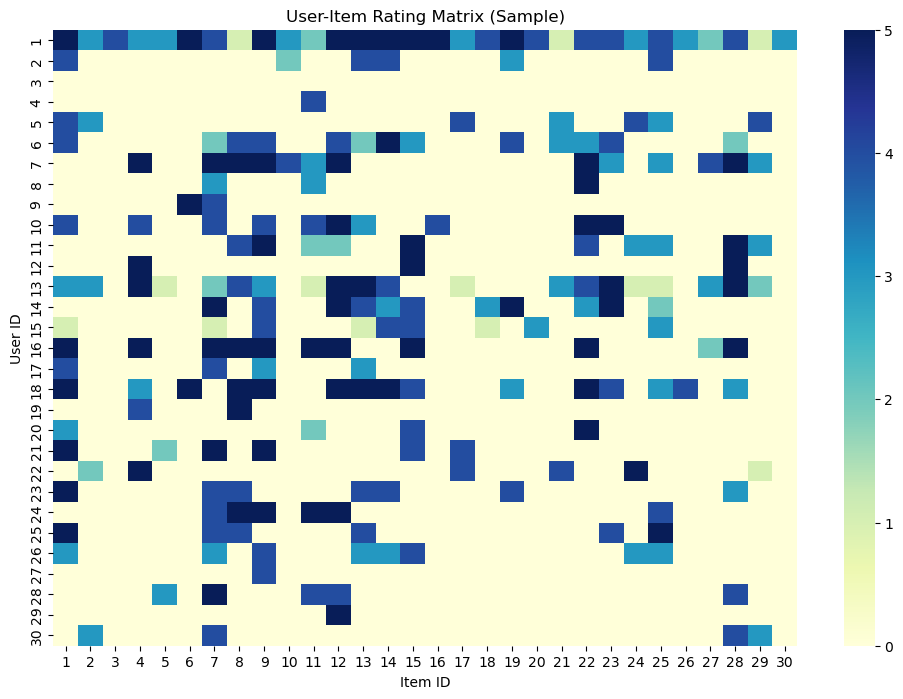

In [7]:
# Load ratings
ratings = pd.read_csv('../data/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

# Pivot to create user-item matrix
pivot_table = ratings.pivot(index='user_id', columns='item_id', values='rating').fillna(0)

# Plot heatmap (first 30 users & 30 items)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table.iloc[:30, :30], cmap='YlGnBu')
plt.title("User-Item Rating Matrix (Sample)")
plt.xlabel("Item ID")
plt.ylabel("User ID")
plt.show()


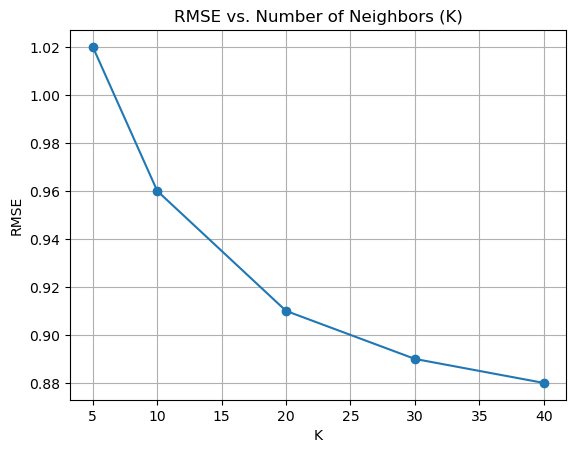

In [8]:
# Simulated RMSE values over K neighbors
k_values = [5, 10, 20, 30, 40]
rmse_values = [1.02, 0.96, 0.91, 0.89, 0.88]

plt.plot(k_values, rmse_values, marker='o')
plt.title("RMSE vs. Number of Neighbors (K)")
plt.xlabel("K")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()
